# Phần 1. Tiền xử lý và Khám phá Dữ liệu (Data Preprocessing & EDA)

## 1.1. Hợp nhất dữ liệu

In [2]:
import pandas as pd
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/DataMining/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/DataMining


In [7]:
movies = pd.read_csv('movies_metadata.csv', on_bad_lines='skip')
credits = pd.read_csv('credits.csv')
keywords = pd.read_csv('keywords.csv', on_bad_lines='skip')

/tmp/ipython-input-1471181709.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movies_metadata.csv', on_bad_lines='skip')


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [9]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [10]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


### 1.1.1. Tiền xử lý dữ liệu trùng lặp

In [11]:
movies.drop_duplicates(inplace=True)
credits.drop_duplicates(inplace=True)
keywords.drop_duplicates(inplace=True)

### 1.1.2. Kiểm tra cột id trong movies có dữ liệu không phải kiểu số không

In [13]:
movies[~movies['id'].astype(str).str.isnumeric()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.1.3. Chuyển đổi cột id từ kiểu object sang int

In [14]:
movies['id'] = pd.to_numeric(movies['id'], errors='coerce').astype('Int64')

In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45453 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45453 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45453 non-null  object 
 3   genres                 45453 non-null  object 
 4   homepage               7780 non-null   object 
 5   id                     45450 non-null  Int64  
 6   imdb_id                45436 non-null  object 
 7   original_language      45442 non-null  object 
 8   original_title         45453 non-null  object 
 9   overview               44499 non-null  object 
 10  popularity             45448 non-null  object 
 11  poster_path            45067 non-null  object 
 12  production_companies   45450 non-null  object 
 13  production_countries   45450 non-null  object 
 14  release_date           45366 non-null  object 
 15  revenue

### 1.1.4. Gộp 3 dataframe lại thành 1 dataframe tổng thể

In [16]:
merged_dataset = credits.merge(keywords, on='id').merge(movies, on='id')
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45462 entries, 0 to 45461
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cast                   45462 non-null  object 
 1   crew                   45462 non-null  object 
 2   id                     45462 non-null  int64  
 3   keywords               45462 non-null  object 
 4   adult                  45462 non-null  object 
 5   belongs_to_collection  4493 non-null   object 
 6   budget                 45462 non-null  object 
 7   genres                 45462 non-null  object 
 8   homepage               7777 non-null   object 
 9   imdb_id                45445 non-null  object 
 10  original_language      45451 non-null  object 
 11  original_title         45462 non-null  object 
 12  overview               44508 non-null  object 
 13  popularity             45459 non-null  object 
 14  poster_path            45076 non-null  object 
 15  pr

### 1.1.5. Chọn các cột đặc trưng

In [17]:
merged_dataset = merged_dataset[['id', 'title', 'overview', 'genres', 'popularity', 'cast', 'crew', 'keywords']]
merged_dataset.head()

,id,title,overview,genres,popularity,cast,crew,keywords
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.946943,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.015539,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.7129,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.859495,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",8.387519,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


### 1.1.6. Xử lý dữ liệu NaN

In [18]:
merged_dataset.isnull().sum()

,0
id,0
title,3
overview,954
genres,0
popularity,3
cast,0
crew,0
keywords,0


In [19]:
merged_dataset.dropna(subset=['title'], inplace=True)

In [20]:
merged_dataset['overview'] = merged_dataset['overview'].fillna('')

In [21]:
merged_dataset.isnull().sum()

,0
id,0
title,0
overview,0
genres,0
popularity,0
cast,0
crew,0
keywords,0


## 1.2. Chuẩn hóa dữ liệu (Normalization)

In [22]:
merged_dataset.iloc[0].genres

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [23]:
merged_dataset.iloc[0].keywords

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

### 1.2.1. Dùng Abstract Syntax Tree để chuyển đổi đối tượng

*   Hàm convert này dùng để lấy tất cả giá trị từ khóa name trong từng phần tử của chuỗi đầu vào obj.
*   ast.literal_eval(obj): Chuyển chuỗi obj thành một đối tượng Python.

In [24]:
import ast
def convert(obj):
  return [i['name'] for i in ast.literal_eval(obj)]

In [25]:
merged_dataset['genres'] = merged_dataset['genres'].apply(convert)
merged_dataset['keywords'] = merged_dataset['keywords'].apply(convert)
merged_dataset.head()

,id,title,overview,genres,popularity,cast,crew,keywords
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]",21.946943,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousy, toy, boy, friendship, friends, riva..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]",17.015539,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[board game, disappearance, based on children'..."
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[Romance, Comedy]",11.7129,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fishing, best friend, duringcreditsstinger, o..."
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]",3.859495,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[based on novel, interracial relationship, sin..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,[Comedy],8.387519,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[baby, midlife crisis, confidence, aging, daug..."


In [26]:
merged_dataset.iloc[0].cast

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

Hàm get_first_3_names này nhận một đối tượng và chuyển đổi thành danh sách các giá trị 'name' từ các từ điển bên trong, sau đó trả về tối đa 3 giá trị đầu tiên.

In [27]:
def get_first_3_names(obj):
  # nếu obj là string thì convert qua list
  if isinstance(obj, str):
    try:
        obj = ast.literal_eval(obj)
    except:
        return []  # Nếu lỗi thì return list rỗng

  # nếu obj là list
  if isinstance(obj, list):
    # Nếu phần tử là dict và chứa khóa 'name' sẽ lấy giá trị của khóa
    # Nếu không sẽ giữ nguyên phần tử và lấy tối đa 3 phần tử đầu tiên
    return [i['name'] if isinstance(i, dict) and 'name' in i else i for i in obj][:3]
  return []

In [28]:
merged_dataset['cast'] = merged_dataset['cast'].apply(get_first_3_names)
merged_dataset.head()

,id,title,overview,genres,popularity,cast,crew,keywords
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]",21.946943,"[Tom Hanks, Tim Allen, Don Rickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousy, toy, boy, friendship, friends, riva..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]",17.015539,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[board game, disappearance, based on children'..."
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[Romance, Comedy]",11.7129,"[Walter Matthau, Jack Lemmon, Ann-Margret]","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fishing, best friend, duringcreditsstinger, o..."
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]",3.859495,"[Whitney Houston, Angela Bassett, Loretta Devine]","[{'credit_id': '52fe44779251416c91011acb', 'de...","[based on novel, interracial relationship, sin..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,[Comedy],8.387519,"[Steve Martin, Diane Keaton, Martin Short]","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[baby, midlife crisis, confidence, aging, daug..."


In [29]:
merged_dataset.iloc[0].crew

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

Hàm fetch_director trả về tên của người có 'job' là 'Director'

In [30]:
def fetch_director(obj):
    return [i['name'] for i in ast.literal_eval(obj) if i['job'] == 'Director']

In [31]:
merged_dataset['crew'] = merged_dataset['crew'].apply(fetch_director)
merged_dataset.head()

,id,title,overview,genres,popularity,cast,crew,keywords
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]",21.946943,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]",17.015539,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],"[board game, disappearance, based on children'..."
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[Romance, Comedy]",11.7129,"[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch],"[fishing, best friend, duringcreditsstinger, o..."
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]",3.859495,"[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker],"[based on novel, interracial relationship, sin..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,[Comedy],8.387519,"[Steve Martin, Diane Keaton, Martin Short]",[Charles Shyer],"[baby, midlife crisis, confidence, aging, daug..."


### 1.2.2. Tách chuỗi trong cột overview thành các danh sách các từ

In [32]:
merged_dataset['overview'][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [33]:
merged_dataset['overview'] = merged_dataset['overview'].apply(lambda x:x.split() if isinstance(x, str) else [])
merged_dataset.head()

,id,title,overview,genres,popularity,cast,crew,keywords
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]",21.946943,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[Adventure, Fantasy, Family]",17.015539,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],"[board game, disappearance, based on children'..."
2,15602,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[Romance, Comedy]",11.7129,"[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch],"[fishing, best friend, duringcreditsstinger, o..."
3,31357,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","[Comedy, Drama, Romance]",3.859495,"[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker],"[based on novel, interracial relationship, sin..."
4,11862,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...",[Comedy],8.387519,"[Steve Martin, Diane Keaton, Martin Short]",[Charles Shyer],"[baby, midlife crisis, confidence, aging, daug..."


In [34]:
empty_overview_rows = merged_dataset[merged_dataset['overview'].apply(lambda x: isinstance(x, list) and not x)]
display(empty_overview_rows)

,id,title,overview,genres,popularity,cast,crew,keywords
32,78802,Wings of Courage,[],"[Romance, Adventure]",0.745542,"[Craig Sheffer, Elizabeth McGovern, Tom Hulce]",[Jean-Jacques Annaud],[]
300,161495,Roommates,[],"[Drama, Comedy]",3.395867,"[Peter Falk, D. B. Sweeney, Julianne Moore]",[Peter Yates],"[grandfather grandson relationship, roommate, ..."
634,287305,Peanuts – Die Bank zahlt alles,[],[Comedy],0.066123,"[Ulrich Mühe, Iris Berben, Marita Marschall]",[Carlo Rola],[]
635,339428,Happy Weekend,[],[Comedy],0.002229,"[Erik Goertz, Anton Rattinger, Dieter Wardetzky]",[],"[sex, adultery, group sex, bisexuality]"
641,10801,The Superwife,[],[Comedy],0.821299,"[Veronica Ferres, Til Schweiger, Joachim Król]",[Sönke Wortmann],"[married couple, book, deceived wife, marriage..."
...,...,...,...,...,...,...,...,...
45338,199887,Over/Under,[],[Drama],0.704642,"[Steven Pasquale, Caroline Dhavernas, Anthony ...",[Bronwen Hughes],[woman director]
45373,317389,Simbad e il califfo di Bagdad,[],[Adventure],0.006352,"[Robert Malcolm, Sonia Wilson, Luigi Bonos]",[Pietro Francisci],[]
45394,468707,Thick Lashes of Lauri Mäntyvaara,[],"[Romance, Comedy]",0.347806,"[Inka Haapamäki, Rosa Honkonen, Tiitus Rantala]",[Hannaleena Hauru],"[fantasy, youth, weird]"
45395,280422,All at Once,[],"[Crime, Comedy]",0.201582,"[Andrey Muravyov, Yuliya Khlynina, Anton Shurt...",[Roman Karimov],"[robbery, mob]"


In [35]:
merged_dataset['genres'] = merged_dataset['genres'].apply(lambda x:[i.replace(" ","") for i in x])
merged_dataset['keywords'] = merged_dataset['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
merged_dataset['cast'] = merged_dataset['cast'].apply(lambda x:[i.replace(" ","") for i in x])
merged_dataset['crew'] = merged_dataset['crew'].apply(lambda x:[i.replace(" ","") for i in x])
merged_dataset.head()

,id,title,overview,genres,popularity,cast,crew,keywords
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]",21.946943,"[TomHanks, TimAllen, DonRickles]",[JohnLasseter],"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[Adventure, Fantasy, Family]",17.015539,"[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[boardgame, disappearance, basedonchildren'sbo..."
2,15602,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[Romance, Comedy]",11.7129,"[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch],"[fishing, bestfriend, duringcreditsstinger, ol..."
3,31357,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","[Comedy, Drama, Romance]",3.859495,"[WhitneyHouston, AngelaBassett, LorettaDevine]",[ForestWhitaker],"[basedonnovel, interracialrelationship, single..."
4,11862,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...",[Comedy],8.387519,"[SteveMartin, DianeKeaton, MartinShort]",[CharlesShyer],"[baby, midlifecrisis, confidence, aging, daugh..."


### 1.2.3. Tạo mới cột tag

In [36]:
merged_dataset['tags'] = merged_dataset['overview'] + merged_dataset['genres'] + merged_dataset['keywords'] + merged_dataset['cast'] + merged_dataset['crew']
merged_dataset.head()

,id,title,overview,genres,popularity,cast,crew,keywords,tags
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]",21.946943,"[TomHanks, TimAllen, DonRickles]",[JohnLasseter],"[jealousy, toy, boy, friendship, friends, riva...","[Led, by, Woody,, Andy's, toys, live, happily,..."
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[Adventure, Fantasy, Family]",17.015539,"[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[boardgame, disappearance, basedonchildren'sbo...","[When, siblings, Judy, and, Peter, discover, a..."
2,15602,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[Romance, Comedy]",11.7129,"[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch],"[fishing, bestfriend, duringcreditsstinger, ol...","[A, family, wedding, reignites, the, ancient, ..."
3,31357,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","[Comedy, Drama, Romance]",3.859495,"[WhitneyHouston, AngelaBassett, LorettaDevine]",[ForestWhitaker],"[basedonnovel, interracialrelationship, single...","[Cheated, on,, mistreated, and, stepped, on,, ..."
4,11862,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...",[Comedy],8.387519,"[SteveMartin, DianeKeaton, MartinShort]",[CharlesShyer],"[baby, midlifecrisis, confidence, aging, daugh...","[Just, when, George, Banks, has, recovered, fr..."


## 1.3. Trực quan hóa dữ liệu

### 1.3.1. Top 10 thể loại phim phổ biến nhất

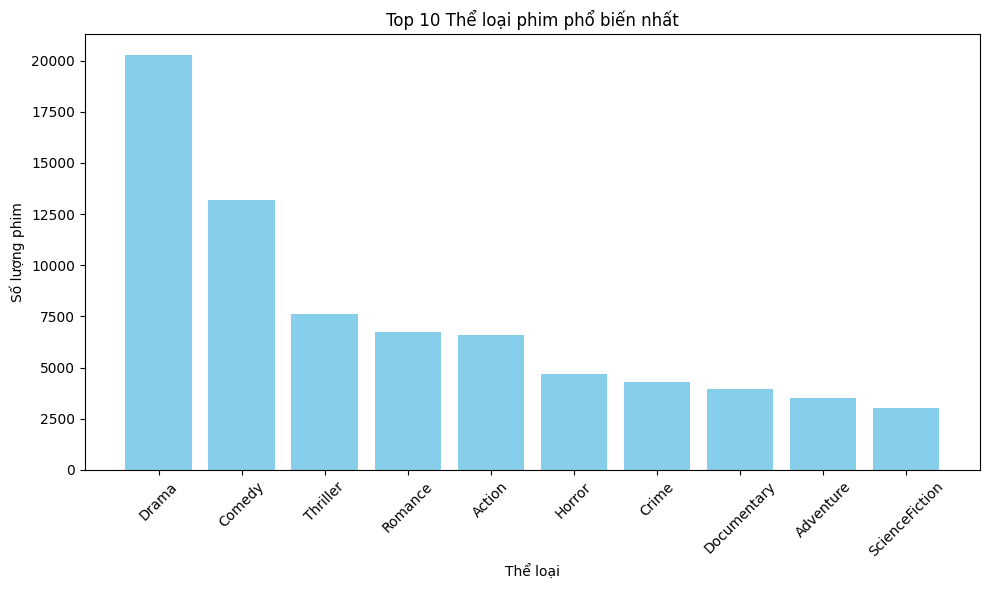

In [37]:
import matplotlib.pyplot as plt
from collections import Counter

# Gom toàn bộ genres lại
all_genres = [genre for sublist in merged_dataset['genres'] for genre in sublist]

# Lấy Top 10 phổ biến
top_10_genres = Counter(all_genres).most_common(10)

# Tách tên và số lượng
labels, values = zip(*top_10_genres)

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.bar(labels, values, color='skyblue')
plt.title('Top 10 Thể loại phim phổ biến nhất')
plt.xlabel('Thể loại')
plt.ylabel('Số lượng phim')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 1.3.2. Biểu đồ xu hướng thể loại phim theo từng năm

In [38]:
# Xử lý ID và ngày phát hành
movies = movies.dropna(subset=['id']).copy()
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies['release_year'] = movies['release_date'].dt.year

In [39]:
movies['genres_list'] = movies['genres'].apply(convert)

# Tách từng thể loại thành dòng riêng
genre_df = movies.explode('genres_list').dropna(subset=['release_year'])

# Đếm số lượng phim theo năm và thể loại
genre_counts = genre_df.groupby(['release_year', 'genres_list']).size().reset_index(name='movie_count')

# Lọc từ năm 1980 đến 2020 và chọn 6 thể loại phổ biến
filtered = genre_counts[(genre_counts['release_year'] >= 1980) & (genre_counts['release_year'] <= 2020)]
top_genres = filtered.groupby('genres_list')['movie_count'].sum().sort_values(ascending=False).head(6).index
filtered_top = filtered[filtered['genres_list'].isin(top_genres)]

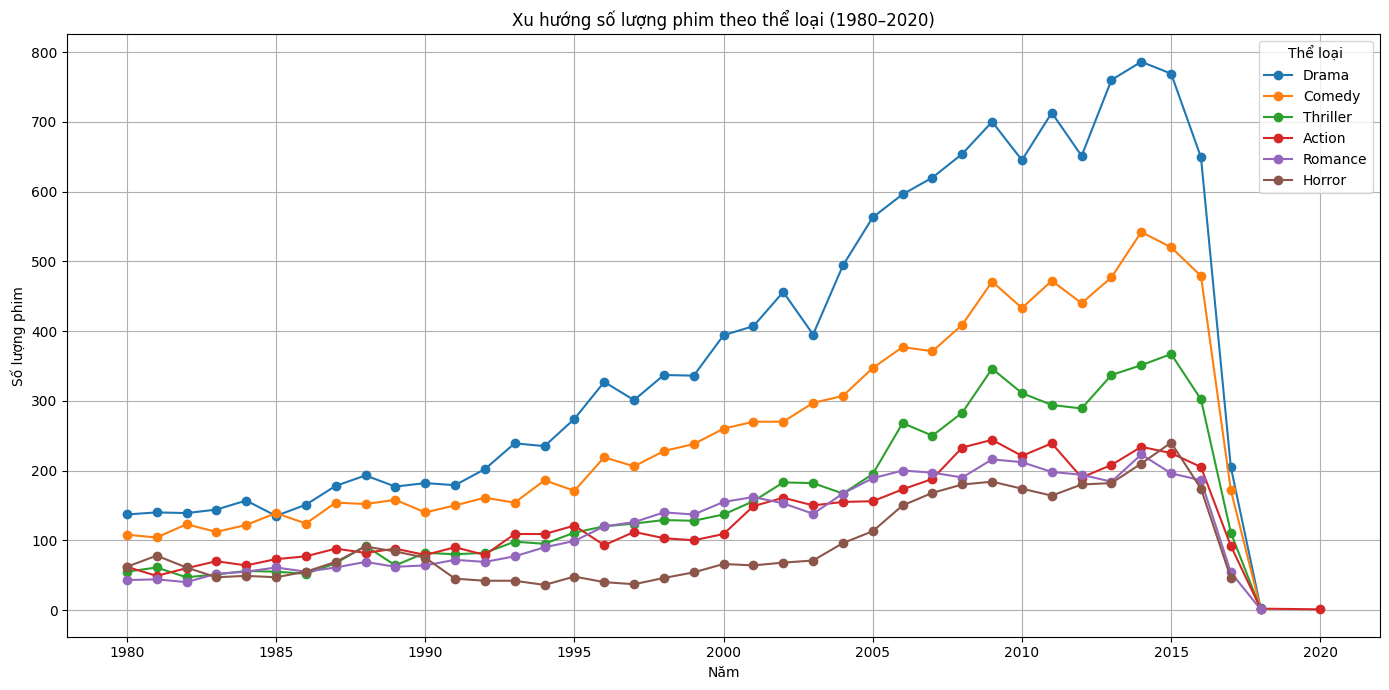

In [40]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
for genre in top_genres:
    data = filtered_top[filtered_top['genres_list'] == genre]
    plt.plot(data['release_year'], data['movie_count'], marker='o', label=genre)

plt.title('Xu hướng số lượng phim theo thể loại (1980–2020)')
plt.xlabel('Năm')
plt.ylabel('Số lượng phim')
plt.legend(title='Thể loại')
plt.grid(True)
plt.tight_layout()
plt.show()

### 1.3.3. Biểu đồ so sánh giữa Đánh giá và Doanh thu

In [41]:
# Bỏ các dòng thiếu dữ liệu hoặc bất thường
df_compare = movies[(movies['vote_average'] > 0) & (movies['revenue'] > 0)]

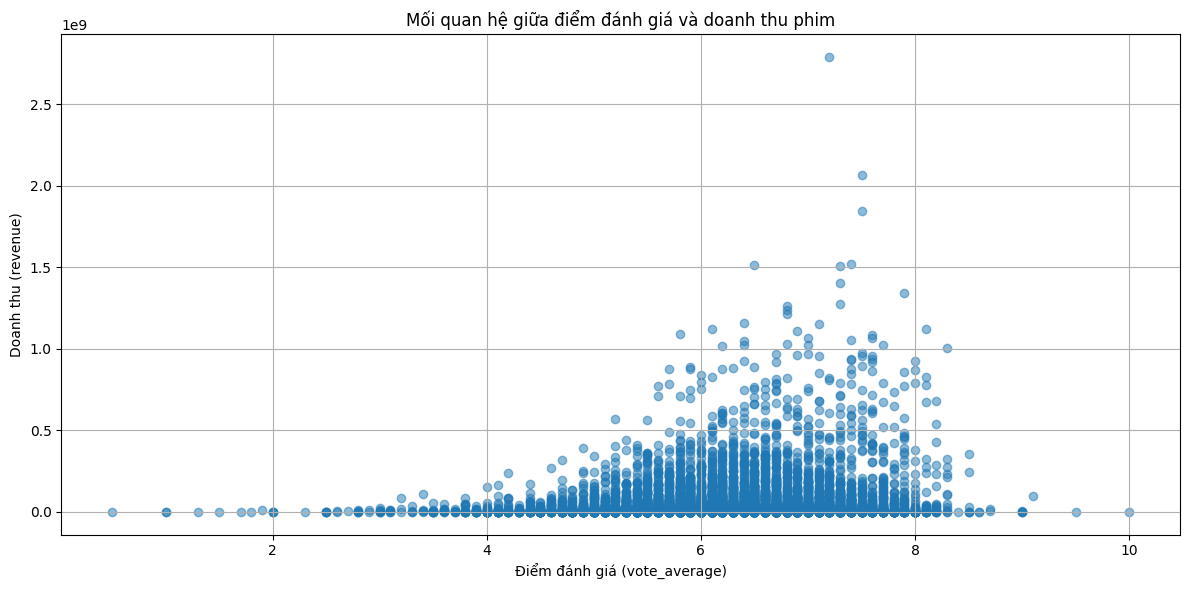

In [42]:
plt.figure(figsize=(12, 6))
plt.scatter(df_compare['vote_average'], df_compare['revenue'], alpha=0.5)
plt.xlabel('Điểm đánh giá (vote_average)')
plt.ylabel('Doanh thu (revenue)')
plt.title('Mối quan hệ giữa điểm đánh giá và doanh thu phim')
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
df_compare[df_compare['revenue'] > 2e9]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year,genres_list
14551,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0,2009.0,"[Action, Adventure, Fantasy, Science Fiction]"
26555,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,en,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,...,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.5,7993.0,2015.0,"[Action, Adventure, Science Fiction, Fantasy]"


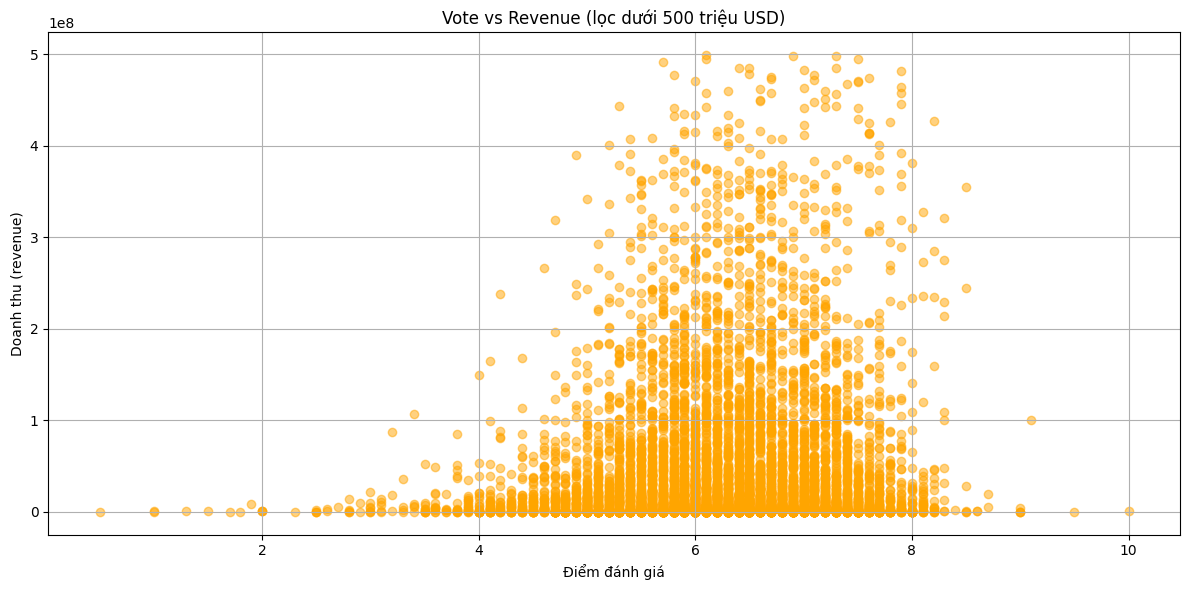

In [44]:
# Giới hạn doanh thu dưới 500 triệu USD để dễ nhìn hơn
df_filtered = df_compare[df_compare['revenue'] < 5e8]

plt.figure(figsize=(12, 6))
plt.scatter(df_filtered['vote_average'], df_filtered['revenue'], alpha=0.5, c='orange')
plt.xlabel('Điểm đánh giá')
plt.ylabel('Doanh thu (revenue)')
plt.title('Vote vs Revenue (lọc dưới 500 triệu USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
import seaborn as sns
df_compare.loc[:, 'vote_average_bin'] = pd.cut(
    df_compare['vote_average'],
    bins=[0, 2, 4, 6, 8, 10],
    labels=['0-2', '2-4', '4-6', '6-8', '8-10']
)

/tmp/ipython-input-2762271028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compare.loc[:, 'vote_average_bin'] = pd.cut(


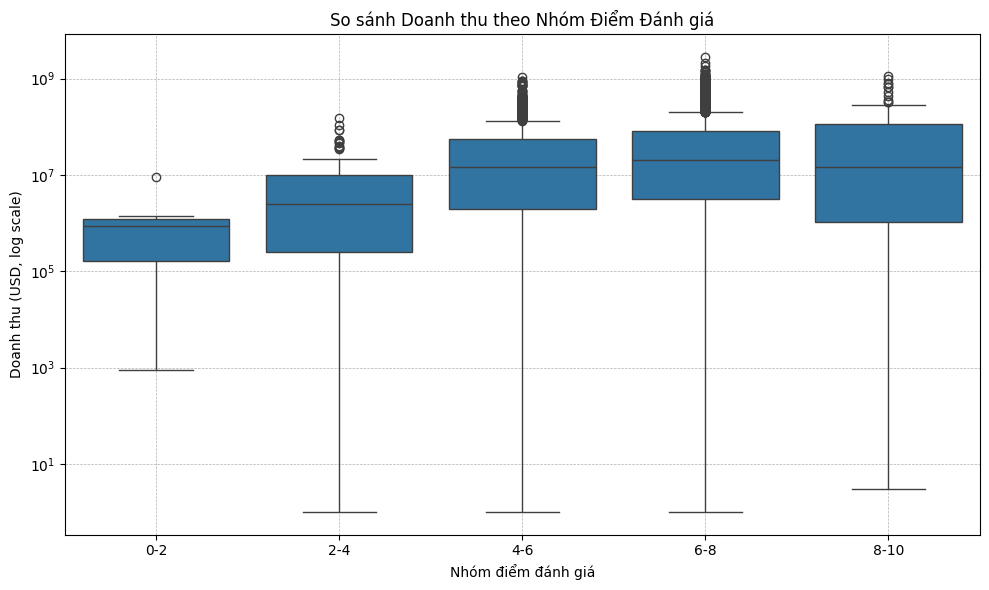

In [46]:
# Vẽ boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_compare,
    x='vote_average_bin',
    y='revenue'
)
plt.yscale('log')
plt.title('So sánh Doanh thu theo Nhóm Điểm Đánh giá')
plt.xlabel('Nhóm điểm đánh giá')
plt.ylabel('Doanh thu (USD, log scale)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Phần 2. Xây dựng hệ thống gợi ý phim

## 2.1. Content Based Filtering

In [47]:
cleanned_dataset = merged_dataset[['id', 'title', 'tags', 'popularity']]
cleanned_dataset

,id,title,tags,popularity
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...",21.946943
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...",17.015539
2,15602,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...",11.7129
3,31357,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...",3.859495
4,11862,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...",8.387519
...,...,...,...,...
45457,439050,Subdue,"[Rising, and, falling, between, a, man, and, w...",0.072051
45458,111109,Century of Birthing,"[An, artist, struggles, to, finish, his, work,...",0.178241
45459,67758,Betrayal,"[When, one, of, her, hits, goes, wrong,, a, pr...",0.903007
45460,227506,Satan Triumphant,"[In, a, small, town, live, two, brothers,, one...",0.003503


In [48]:
cleanned_dataset.loc[:, 'tags'] = cleanned_dataset['tags'].apply(lambda x: ' '.join(x))
cleanned_dataset.loc[:, 'tags'] = cleanned_dataset['tags'].apply(lambda x:x.lower())
cleanned_dataset['tags'][0]

"led by woody, andy's toys live happily in his room until andy's birthday brings buzz lightyear onto the scene. afraid of losing his place in andy's heart, woody plots against buzz. but when circumstances separate buzz and woody from their owner, the duo eventually learns to put aside their differences. animation comedy family jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife tomhanks timallen donrickles johnlasseter"

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')
vector = cv.fit_transform(cleanned_dataset['tags']).toarray()
vector.shape

(45459, 5000)

In [50]:
vector[0]

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
import nltk
#thuật toán cắt tỉa từ (stemming) để rút gọn từ về gốc của nó.
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [52]:
def stem(word):
  return " ".join([ps.stem(word) for word in word.split()])

In [53]:
cleanned_dataset.loc[:, 'tags'] = cleanned_dataset['tags'].apply(stem)
cleanned_dataset.head()

,id,title,tags,popularity
0,862,Toy Story,"led by woody, andy' toy live happili in hi roo...",21.946943
1,8844,Jumanji,when sibl judi and peter discov an enchant boa...,17.015539
2,15602,Grumpier Old Men,a famili wed reignit the ancient feud between ...,11.7129
3,31357,Waiting to Exhale,"cheat on, mistreat and step on, the women are ...",3.859495
4,11862,Father of the Bride Part II,just when georg bank ha recov from hi daughter...,8.387519


In [54]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector[:1000])
#Lấy 1000 mẫu để tối ưu hóa

In [55]:
def recommend(movie):
    # Lấy chỉ số của bộ phim trong DataFrame
    try:
      movie_index = cleanned_dataset[cleanned_dataset['title'] == movie].index[0]
    except IndexError:
      return ["Movie not found"]

    # Lấy danh sách các độ tương đồng với bộ phim đã cho
    distances = similarity[movie_index]

    # Sắp xếp danh sách phim theo độ tương đồng, lấy 5 phim tương tự nhất
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[0:6]

    # Tạo danh sách để lưu tên các bộ phim gợi ý
    recommended_movies = []
    for i in movies_list:
      recommended_movies.append(cleanned_dataset.iloc[i[0]].title)

    return recommended_movies

In [56]:
recommend('Grumpier Old Men')

['Grumpier Old Men',
 "Gone Fishin'",
 'A Goofy Movie',
 'Go Fish',
 'Meet John Doe',
 'Fearless']

## 2.2. Collaborative Filtering

In [57]:
import pandas as pd
ratings = pd.read_csv('ratings_small.csv')
ratings.shape

(100004, 4)

In [58]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [59]:
ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [60]:
# Tạo user-movie matrix (tối ưu cho dataset lớn)
# Lấy subset để tối ưu tốc độ
top_users = ratings['userId'].value_counts().head(1000).index
top_movies = ratings['movieId'].value_counts().head(1000).index

# Lọc ratings
subset_ratings = ratings[
    (ratings['userId'].isin(top_users)) &
    (ratings['movieId'].isin(top_movies))
]

# Tạo pivot table
user_item_matrix = subset_ratings.pivot_table(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)

In [61]:
user_item_matrix

movieId,1,2,3,5,6,7,10,11,14,16,...,106920,109374,109487,111759,112552,112852,115713,116797,122882,122886
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# Tính item similarity
from sklearn.metrics.pairwise import cosine_similarity
item_similarity = cosine_similarity(user_item_matrix.T)
print(f"Item similarity matrix shape: {item_similarity.shape}")
item_similarity

Item similarity matrix shape: (1000, 1000)


array([[1.        , 0.39451145, 0.30651588, ..., 0.18441638, 0.19859925,
        0.18411417],
       [0.39451145, 1.        , 0.21749153, ..., 0.04718786, 0.06575933,
        0.10028772],
       [0.30651588, 0.21749153, 1.        , ..., 0.        , 0.0168717 ,
        0.02168419],
       ...,
       [0.18441638, 0.04718786, 0.        , ..., 1.        , 0.39939592,
        0.29728264],
       [0.19859925, 0.06575933, 0.0168717 , ..., 0.39939592, 1.        ,
        0.5099937 ],
       [0.18411417, 0.10028772, 0.02168419, ..., 0.29728264, 0.5099937 ,
        1.        ]])

In [63]:
#Collaborative Filtering function (Fixed - chỉ trả về movies có trong cleandata)
def collaborative_filtering(user_id, n_recommendations=5):
    """Item-based collaborative filtering - chỉ trả về movies có tên"""
    if user_id not in user_item_matrix.index:
        return []

    # Lấy danh sách movie IDs có trong cleanned_dataset
    available_movie_ids = set(cleanned_dataset['id'].tolist())

    # Lấy ratings của user
    user_ratings = user_item_matrix.loc[user_id]

    # Tìm movies chưa được rate và có trong cleanned_dataset
    unrated_movies = user_ratings[user_ratings == 0].index
    valid_unrated_movies = [mid for mid in unrated_movies if mid in available_movie_ids]

    predictions = []

    for movie_id in valid_unrated_movies:
        try:
            movie_idx = list(user_item_matrix.columns).index(movie_id)

            weighted_sum = 0
            similarity_sum = 0

            # Tính predicted rating dựa trên similarity
            for rated_movie_id, rating in user_ratings[user_ratings > 0].items():
                try:
                    rated_idx = list(user_item_matrix.columns).index(rated_movie_id)
                    similarity = item_similarity[movie_idx][rated_idx]

                    # Chỉ xét similarity > threshold
                    if similarity > 0.1:
                        weighted_sum += similarity * rating
                        similarity_sum += abs(similarity)
                except:
                    continue

            if similarity_sum > 0:
                predicted_rating = weighted_sum / similarity_sum
                predictions.append((movie_id, predicted_rating))
        except:
            continue

    # Sort và return top N
    predictions.sort(key=lambda x: x[1], reverse=True)
    return predictions[:n_recommendations]

In [64]:
# Test Collaborative Filtering
test_user = user_item_matrix.index[10]
cf_recommendations = collaborative_filtering(test_user)

print(f"Collaborative Filtering cho User {test_user}:")
for i, (movie_id, rating) in enumerate(cf_recommendations, 1):
    # Tìm tên phim từ cleanned_dataset
    movie_info = cleanned_dataset[cleanned_dataset['id'] == movie_id]
    movie_title = movie_info['title'].iloc[0] if not movie_info.empty else f"Movie {movie_id}"
    print(f"{i}. {movie_title} (Predicted: {rating:.2f})")

Collaborative Filtering cho User 11:
1. The White Sound (Predicted: 4.91)
2. My Own Private Idaho (Predicted: 4.87)
3. Underworld (Predicted: 4.85)
4. Dead Poets Society (Predicted: 4.58)
5. The Wages of Fear (Predicted: 4.57)


## 2.3. Hybrid

In [65]:
# Hybrid functio
def hybrid_recommend(user_id=None, movie_title=None, content_weight=0.5, cf_weight=0.5, n_recommendations=5):
    """Hybrid recommendation: Content-based + Collaborative Filtering"""
    recommendations = {}

    # Content-based part
    if movie_title:
        try:
            movie_index = cleanned_dataset[cleanned_dataset['title'] == movie_title].index[0]
            distances = similarity[movie_index]
            content_movies = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:n_recommendations*2]

            for i, score in content_movies:
                movie_id = cleanned_dataset.iloc[i]['id']
                # Scale content score lên cao hơn để cân bằng với CF
                content_score = score * 5 * content_weight  # Nhân 5 để boost content score

                recommendations[movie_id] = {
                    'title': cleanned_dataset.iloc[i]['title'],
                    'content_score': content_score,
                    'cf_score': 0,
                    'total_score': content_score
                }
        except:
            pass

    # Collaborative filtering part
    if user_id and user_id in user_item_matrix.index:
        cf_recs = collaborative_filtering(user_id, n_recommendations*2)

        for movie_id, pred_rating in cf_recs:
            # Giảm scale của CF score để cân bằng
            cf_score = (pred_rating - 1) / 4 * cf_weight  # Giữ nguyên normalize 0-1

            if movie_id in recommendations:
                recommendations[movie_id]['cf_score'] = cf_score
                recommendations[movie_id]['total_score'] += cf_score
            else:
                movie_info = cleanned_dataset[cleanned_dataset['id'] == movie_id]
                title = movie_info['title'].iloc[0] if not movie_info.empty else f"Movie {movie_id}"

                recommendations[movie_id] = {
                    'title': title,
                    'content_score': 0,
                    'cf_score': cf_score,
                    'total_score': cf_score
                }

    # Sort theo total score
    sorted_recs = sorted(recommendations.items(), key=lambda x: x[1]['total_score'], reverse=True)

    return sorted_recs[:n_recommendations]

In [66]:
# Test Hybrid (Balanced)
print("=== HYBRID RECOMMENDATIONS (BALANCED) ===")
hybrid_recs = hybrid_recommend(
    user_id=test_user,
    movie_title='Toy Story',
    content_weight=0.5,
    cf_weight=0.5,
    n_recommendations=5
)

print(f"Hybrid cho User {test_user} + 'Toy Story':")
for i, (movie_id, data) in enumerate(hybrid_recs, 1):
    print(f"{i}. {data['title']}")
    print(f"   Content: {data['content_score']:.3f}, CF: {data['cf_score']:.3f}, Total: {data['total_score']:.3f}")

# Test với weights khác nhau
print(f"\nHybrid với 70% Content, 30% CF:")
hybrid_content_heavy = hybrid_recommend(
    user_id=test_user,
    movie_title='Toy Story',
    content_weight=0.7,
    cf_weight=0.3,
    n_recommendations=3
)

for i, (movie_id, data) in enumerate(hybrid_content_heavy, 1):
    print(f"{i}. {data['title']} (Total: {data['total_score']:.3f})")

=== HYBRID RECOMMENDATIONS (BALANCED) ===
Hybrid cho User 11 + 'Toy Story':
1. The White Sound
   Content: 0.000, CF: 0.489, Total: 0.489
2. My Own Private Idaho
   Content: 0.000, CF: 0.483, Total: 0.483
3. Underworld
   Content: 0.000, CF: 0.482, Total: 0.482
4. Dead Poets Society
   Content: 0.000, CF: 0.448, Total: 0.448
5. The Wages of Fear
   Content: 0.000, CF: 0.446, Total: 0.446

Hybrid với 70% Content, 30% CF:
1. The Flintstones (Total: 0.591)
2. Peanuts – Die Bank zahlt alles (Total: 0.553)
3. Window to Paris (Total: 0.541)


In [106]:
# Final recommend function
def recommend_final(user_id=None, movie_title=None, method='hybrid', n_recommendations=5):
    """
    Final recommendation function
    method: 'content', 'collaborative', 'hybrid'
    """
    if method == 'content':
        # Sử dụng hàm recommend có sẵn từ content-based
        return recommend(movie_title)[:n_recommendations]

    elif method == 'collaborative':
        if user_id is None:
            return "Cần user_id cho collaborative filtering"

        cf_recs = collaborative_filtering(user_id, n_recommendations)
        results = []
        for movie_id, rating in cf_recs:
            movie_info = cleanned_dataset[cleanned_dataset['id'] == movie_id]
            title = movie_info['title'].iloc[0] if not movie_info.empty else f"Movie {movie_id}"
            results.append(title)
        return results

    elif method == 'hybrid':
        hybrid_recs = hybrid_recommend(user_id, movie_title, 0.4, 0.6, n_recommendations)
        return [data['title'] for movie_id, data in hybrid_recs]

    else:
        return "Method phải là 'content', 'collaborative', hoặc 'hybrid'"

In [78]:
# 100 Users có trong hệ thống
print("=== 10 USERS CÓ TRONG HỆ THỐNG ===")
available_users = list(user_item_matrix.index[:100])
print("User IDs bạn có thể sử dụng:")
for i, user_id in enumerate(available_users, 1):
   user_ratings_count = (user_item_matrix.loc[user_id] > 0).sum()
   print(f"{i}. User {user_id} (có {user_ratings_count} ratings)")

print(f"\nVí dụ sử dụng:")
print(f"recommend_final(user_id={available_users[0]}, method='collaborative')")
print(f"recommend_final(user_id={available_users[1]}, movie_title='Toy Story', method='hybrid')")

=== 10 USERS CÓ TRONG HỆ THỐNG ===
User IDs bạn có thể sử dụng:
1. User 1 (có 20 ratings)
2. User 2 (có 68 ratings)
3. User 3 (có 41 ratings)
4. User 4 (có 152 ratings)
5. User 5 (có 99 ratings)
6. User 6 (có 42 ratings)
7. User 7 (có 82 ratings)
8. User 8 (có 105 ratings)
9. User 9 (có 38 ratings)
10. User 10 (có 30 ratings)
11. User 11 (có 19 ratings)
12. User 12 (có 30 ratings)
13. User 13 (có 51 ratings)
14. User 14 (có 16 ratings)
15. User 15 (có 748 ratings)
16. User 16 (có 24 ratings)
17. User 17 (có 204 ratings)
18. User 18 (có 36 ratings)
19. User 19 (có 283 ratings)
20. User 20 (có 74 ratings)
21. User 21 (có 135 ratings)
22. User 22 (có 186 ratings)
23. User 23 (có 408 ratings)
24. User 24 (có 18 ratings)
25. User 25 (có 21 ratings)
26. User 26 (có 127 ratings)
27. User 27 (có 20 ratings)
28. User 28 (có 45 ratings)
29. User 29 (có 12 ratings)
30. User 30 (có 446 ratings)
31. User 31 (có 62 ratings)
32. User 32 (có 47 ratings)
33. User 33 (có 71 ratings)
34. User 34 (có 138 

In [107]:
# Demo final function
print("=== DEMO FINAL FUNCTION ===")

print("1. Content-based:")
print(recommend_final(movie_title='Beverly Hills Cop III', method='content', n_recommendations=5))

print(f"\n2. Collaborative filtering:")
print(recommend_final(user_id=72, method='collaborative', n_recommendations=5))

print(f"\n3. Hybrid:")
print(recommend_final(user_id=72, movie_title='Beverly Hills Cop III', method='hybrid', n_recommendations=5))

=== DEMO FINAL FUNCTION ===
1. Content-based:
['Beverly Hills Cop III', 'Love and a .45', 'The Outlaw', 'Die Hard: With a Vengeance', 'Bad Boys']

2. Collaborative filtering:
['Beverly Hills Cop III', "Pirates of the Caribbean: Dead Man's Chest", 'Wings of Desire', 'Edward Scissorhands', 'Alien']

3. Hybrid:
['Love and a .45', 'Beverly Hills Cop III', "Pirates of the Caribbean: Dead Man's Chest", 'Wings of Desire', 'The Outlaw']


# Phần 3. Phân chia dữ liệu và huấn luyện mô hình

## 3.1. Hàm chia dữ liệu

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
def split_ratings(ratings, test_size=0.2, random_state=42):
  train_list = []
  test_list = []

  # nhóm các cột trong ratings lại theo userId
  for user_id, user_group in ratings.groupby('userId'):
    if(len(user_group) < 5): # Kiểm tra điều kiện user này có < 5 đánh giá (ít) --> lấy hết
      train_list.append(user_group)
      continue

    # chia ratings thành 80% train và 20% test
    train, test = train_test_split(user_group, test_size=test_size, random_state=random_state)
    train_list.append(train)
    test_list.append(test)

  ratings_train = pd.concat(train_list).reset_index(drop=True)
  ratings_test = pd.concat(test_list).reset_index(drop=True)

  return ratings_train, ratings_test

In [110]:
ratings_train, ratings_test = split_ratings(ratings)

print(f"Ratings TRAIN: {ratings_train.shape}")
print(f"Ratings TEST: {ratings_test.shape}")

Ratings TRAIN: (79748, 4)
Ratings TEST: (20256, 4)


<Axes: >

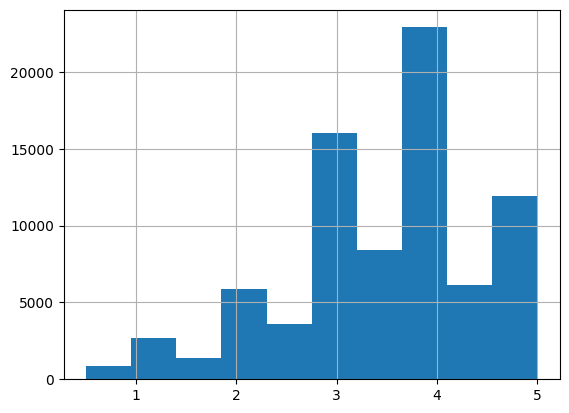

In [111]:
ratings_train['rating'].hist()

<Axes: >

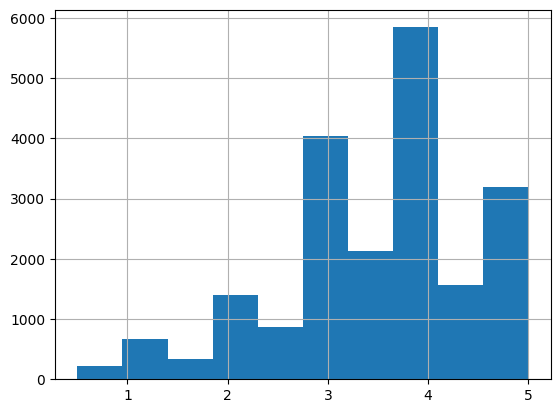

In [112]:
ratings_test['rating'].hist()

## 3.2. Tạo ma trận user_item cho tập train

In [113]:
user_item_matrix_train = ratings_train.pivot_table(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)

user_item_matrix_train

movieId,1,2,3,4,5,6,7,8,9,10,...,160718,161084,161155,161594,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.3. Tính item similarity

In [114]:
item_similarity_train = cosine_similarity(user_item_matrix_train.T)
print(f"Item similarity matrix shape: {item_similarity_train.shape}")
item_similarity_train

Item similarity matrix shape: (8418, 8418)


array([[1.        , 0.40942423, 0.25460338, ..., 0.        , 0.        ,
        0.07094999],
       [0.40942423, 1.        , 0.24595025, ..., 0.        , 0.        ,
        0.        ],
       [0.25460338, 0.24595025, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.07094999, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [115]:
def collaborative_filtering_train(user_id, n_recommendations=5):
    """Item-based collaborative filtering - chỉ trả về movies có tên"""
    if user_id not in user_item_matrix_train.index:
        return []

    # Lấy danh sách movie IDs có trong cleanned_dataset
    available_movie_ids = set(cleanned_dataset['id'].tolist())

    # Lấy ratings của user
    user_ratings = user_item_matrix_train.loc[user_id]

    # Tìm movies chưa được rate và có trong cleanned_dataset
    unrated_movies = user_ratings[user_ratings == 0].index
    valid_unrated_movies = [mid for mid in unrated_movies if mid in available_movie_ids]

    predictions = []

    for movie_id in valid_unrated_movies:
        try:
            movie_idx = list(user_item_matrix_train.columns).index(movie_id)

            weighted_sum = 0
            similarity_sum = 0

            # Tính predicted rating dựa trên similarity
            for rated_movie_id, rating in user_ratings[user_ratings > 0].items():
                try:
                    rated_idx = list(user_item_matrix_train.columns).index(rated_movie_id)
                    similarity = item_similarity_train[movie_idx][rated_idx]

                    # Chỉ xét similarity > threshold
                    if similarity > 0.1:
                        weighted_sum += similarity * rating
                        similarity_sum += abs(similarity)
                except:
                    continue

            if similarity_sum > 0:
                predicted_rating = weighted_sum / similarity_sum
                predictions.append((movie_id, predicted_rating))
        except:
            continue

    # Sort và return top N
    predictions.sort(key=lambda x: x[1], reverse=True)
    return predictions[:n_recommendations]

## 3.4. Thử nghiệm user

In [116]:
user_ratings = user_item_matrix_train.loc[user_item_matrix_train.index[0]]
print(user_ratings[user_ratings > 0])
print("Mean rating:", user_ratings[user_ratings > 0].mean())

movieId
1061    3.0
1129    2.0
1172    4.0
1263    2.0
1287    2.0
1293    2.0
1339    3.5
1343    2.0
1371    2.5
1405    1.0
1953    4.0
2105    4.0
2150    3.0
2294    2.0
2968    1.0
3671    3.0
Name: 1, dtype: float64
Mean rating: 2.5625


In [117]:
test_user = user_item_matrix_train.index[0]
cf_recommendations = collaborative_filtering_train(test_user)

print(f"Collaborative Filtering cho User {test_user}:")
for i, (movie_id, rating) in enumerate(cf_recommendations, 1):
    # Tìm tên phim từ cleandata
    movie_info = cleanned_dataset[cleanned_dataset['id'] == movie_id]
    movie_title = movie_info['title'].iloc[0] if not movie_info.empty else f"Movie {movie_id}"
    print(f"{i}. {movie_title} (Predicted: {rating:.2f})")

Collaborative Filtering cho User 1:
1. A History of Violence (Predicted: 4.00)
2. Before Sunset (Predicted: 4.00)
3. Sin City (Predicted: 4.00)
4. Rio Bravo (Predicted: 4.00)
5. Wild at Heart (Predicted: 4.00)


In [118]:
test_user = user_item_matrix_train.index[74]
cf_recommendations = collaborative_filtering_train(test_user)

print(f"Collaborative Filtering cho User {test_user}:")
for i, (movie_id, rating) in enumerate(cf_recommendations, 1):
    # Tìm tên phim từ cleandata
    movie_info = cleanned_dataset[cleanned_dataset['id'] == movie_id]
    movie_title = movie_info['title'].iloc[0] if not movie_info.empty else f"Movie {movie_id}"
    print(f"{i}. {movie_title} (Predicted: {rating:.2f})")

Collaborative Filtering cho User 75:
1. Sixtynine (Predicted: 4.75)
2. Mega Python vs. Gatoroid (Predicted: 4.61)
3. Vares - The Girls of April (Predicted: 4.50)
4. In July (Predicted: 4.50)
5. The Piano Player (Predicted: 4.50)


# Phần 4. Biến đổi Dữ liệu sang dạng giao dịch (transaction)

In [119]:
# Lọc ra người dùng đã đánh giá >= 3.5 để tạo transaction chất lượng khi gợi ý phim
top_ratings = ratings_train[ratings_train['rating'] >= 3.5]

# Chỉ giữ lại các movieId có trong cleandata
valid_movie_ids = set(cleanned_dataset['id'])

top_ratings = top_ratings[top_ratings['movieId'].isin(valid_movie_ids)]

print(top_ratings)
top_ratings.info()

       userId  movieId  rating   timestamp
6           1     2105     4.0  1260759139
16          2      150     5.0   835355395
19          2      253     4.0   835355511
26          2      314     4.0   835356044
27          2      110     4.0   835355532
...       ...      ...     ...         ...
79721     671     5991     4.5  1064245387
79729     671     2359     4.0  1063503933
79735     671     5816     4.0  1065111963
79745     671     4973     4.5  1064245471
79746     671     2355     4.0  1063500762

[21878 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 21878 entries, 6 to 79746
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     21878 non-null  int64  
 1   movieId    21878 non-null  int64  
 2   rating     21878 non-null  float64
 3   timestamp  21878 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 854.6 KB


In [120]:
# Trộn bảng top_ratings với cleanned_dataset để lấy tên phim
top_ratings['movieId'] = pd.to_numeric(top_ratings['movieId'], errors='coerce').astype('Int64')

merged_ratings = pd.merge(top_ratings, cleanned_dataset[['id', 'title']], left_on='movieId', right_on='id', how='left')

# Xóa các dòng không có tên phim
merged_ratings = merged_ratings.dropna(subset=['title']).drop(columns=['timestamp'])
merged_ratings

,userId,movieId,rating,id,title
0,1,2105,4.0,2105,American Pie
1,2,150,5.0,150,48 Hrs.
2,2,253,4.0,253,Live and Let Die
3,2,314,4.0,314,Catwoman
4,2,110,4.0,110,Three Colors: Red
...,...,...,...,...,...
21879,671,5991,4.5,5991,The Last Laugh
21880,671,2359,4.0,2359,Sicko
21881,671,5816,4.0,5816,Waiter
21882,671,4973,4.5,4973,Under the Sand


## 4.1. Tạo tập transaction

In [121]:
transactions = merged_ratings.groupby('userId')['title'].apply(list).tolist()

In [122]:
transactions[:5]

[['American Pie'],
 ['48 Hrs.',
  'Live and Let Die',
  'Catwoman',
  'Three Colors: Red',
  'The Poseidon Adventure',
  'Contempt',
  'Reservoir Dogs',
  'Berlin: Symphony of a Great City',
  'The Devil Wears Prada',
  'Love Actually',
  'The Marriage of Maria Braun',
  'The White Sound',
  'Romeo + Juliet',
  'Lili Marleen',
  'Notting Hill',
  'Once Were Warriors',
  'Terminator 3: Rise of the Machines',
  'The Dark',
  'Monsoon Wedding',
  'Cat on a Hot Tin Roof',
  'Not Here to Be Loved',
  'The Conversation'],
 ['Terminator 3: Rise of the Machines',
  "Monsieur  Hulot's Holiday",
  'Say Anything...',
  'License to Wed',
  'The Million Dollar Hotel',
  'Three Colors: Red',
  'Shortbus',
  'The Killing',
  'All the Way Boys',
  'Rope'],
 ['Superstar: The Karen Carpenter Story',
  'Monsoon Wedding',
  'The Terminal',
  'Tough Enough',
  'David',
  "Teheran '43",
  'Infinity',
  'I Love You to Death',
  "One Night at McCool's",
  'Night Watch',
  'Notes on a Scandal',
  'The Big Slee

## 4.2. Sử dụng TransactionEncoder để chuyển đổi danh sách transactions thành một DataFrame dạng one-hot encoding phù hợp cho thuật toán Apriori

In [123]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

# Mỗi dòng là 1 người dùng (Apriori không quan tâm người dùng là ai)
# Mỗi cột là một bộ phim (True - user đánh giá cao, False - không đánh giá cao)
df_trans = pd.DataFrame(te_array, columns=te.columns_)
df_trans = df_trans[df_trans.sum(axis=1) >= 2]

In [ ]:
df_trans.head()

,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",13 Tzameti,1408,15 Minutes,16 Blocks,...,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [124]:
# In ra các transaction có giá trị True (trong 5 user đầu tiên)
for idx, row in df_trans.head(5).iterrows():
    true_items = row[row == True].index.tolist()
    print(f"Transaction {idx + 1}: {true_items}")

Transaction 2: ['48 Hrs.', 'Berlin: Symphony of a Great City', 'Cat on a Hot Tin Roof', 'Catwoman', 'Contempt', 'Lili Marleen', 'Live and Let Die', 'Love Actually', 'Monsoon Wedding', 'Not Here to Be Loved', 'Notting Hill', 'Once Were Warriors', 'Reservoir Dogs', 'Romeo + Juliet', 'Terminator 3: Rise of the Machines', 'The Conversation', 'The Dark', 'The Devil Wears Prada', 'The Marriage of Maria Braun', 'The Poseidon Adventure', 'The White Sound', 'Three Colors: Red']
Transaction 3: ['All the Way Boys', 'License to Wed', "Monsieur  Hulot's Holiday", 'Rope', 'Say Anything...', 'Shortbus', 'Terminator 3: Rise of the Machines', 'The Killing', 'The Million Dollar Hotel', 'Three Colors: Red']
Transaction 4: ['Aguirre: The Wrath of God', 'Aliens vs Predator: Requiem', 'American Pie', 'Arlington Road', 'As It Is in Heaven', 'Batman Returns', 'Because I Said So', 'Blood: The Last Vampire', 'Bridge to Terabithia', "Carla's Song", 'Casablanca', 'Cockles and Muscles', 'Cold Mountain', 'Color of 

# Phần 5. Khai thác tập phổ biến với Apriori

In [125]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_trans, min_support=0.02, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,support,itemsets
356,0.315234,(The Million Dollar Hotel)
309,0.304676,(Terminator 3: Rise of the Machines)
313,0.297134,(The 39 Steps)
290,0.283560,(Solaris)
242,0.263952,(Once Were Warriors)
...,...,...
18199,0.021116,"(Sleepless in Seattle, The 39 Steps, The Talen..."
18197,0.021116,"(Sleepless in Seattle, Terminator 3: Rise of t..."
18193,0.021116,"(Sleepless in Seattle, Terminator 3: Rise of t..."
18192,0.021116,"(Sleepless in Seattle, Terminator 3: Rise of t..."


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


# Phần 6. Sinh các tập phổ biến và phân tích luật kết hợp

## 6.1. Sinh tập phổ biến

In [126]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4).sort_values(by='lift', ascending=False)
rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
390,(Broken Flowers),(Beverly Hills Cop III),0.022624,0.040724,0.021116,0.933333,22.918519,1.0,0.020195,14.389140,0.978505,0.500000,0.930503,0.725926
389,(Beverly Hills Cop III),(Broken Flowers),0.040724,0.022624,0.021116,0.518519,22.918519,1.0,0.020195,2.029934,0.996968,0.500000,0.507373,0.725926
44814,"(Nostalgia, Scarface)","(Lonely Hearts, Dawn of the Dead, Terminator 3...",0.027149,0.034691,0.021116,0.777778,22.420290,1.0,0.020174,4.343891,0.982060,0.518519,0.769792,0.693237
44803,"(Lonely Hearts, Dawn of the Dead, Terminator 3...","(Nostalgia, Scarface)",0.034691,0.027149,0.021116,0.608696,22.420290,1.0,0.020174,2.486174,0.989732,0.518519,0.597776,0.693237
43909,"(Notes on a Scandal, Bridge to Terabithia, Blo...","(Fools Rush In, The Talented Mr. Ripley)",0.030166,0.036199,0.022624,0.750000,20.718750,1.0,0.021532,3.855204,0.981337,0.517241,0.740610,0.687500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7127,"(Monsoon Wedding, Batman Returns)",(The Million Dollar Hotel),0.067873,0.315234,0.027149,0.400000,1.268900,1.0,0.005753,1.141277,0.227346,0.076271,0.123789,0.243062
1677,(Rocky IV),(The Million Dollar Hotel),0.060332,0.315234,0.024133,0.400000,1.268900,1.0,0.005114,1.141277,0.225522,0.068670,0.123789,0.238278
11848,"(Once Were Warriors, Dawn of the Dead)",(The Million Dollar Hotel),0.075415,0.315234,0.030166,0.400000,1.268900,1.0,0.006393,1.141277,0.229201,0.083682,0.123789,0.247847
5529,"(Once Were Warriors, All the Way Boys)",(The Million Dollar Hotel),0.052790,0.315234,0.021116,0.400000,1.268900,1.0,0.004475,1.141277,0.223726,0.060870,0.123789,0.233493


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [127]:
# Lọc lift để lấy độ tin cậy cao hơn
rules = rules[rules['lift'] >= 1.2]
rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
390,(Broken Flowers),(Beverly Hills Cop III),0.022624,0.040724,0.021116,0.933333,22.918519,1.0,0.020195,14.389140,0.978505,0.500000,0.930503,0.725926
389,(Beverly Hills Cop III),(Broken Flowers),0.040724,0.022624,0.021116,0.518519,22.918519,1.0,0.020195,2.029934,0.996968,0.500000,0.507373,0.725926
44814,"(Nostalgia, Scarface)","(Lonely Hearts, Dawn of the Dead, Terminator 3...",0.027149,0.034691,0.021116,0.777778,22.420290,1.0,0.020174,4.343891,0.982060,0.518519,0.769792,0.693237
44803,"(Lonely Hearts, Dawn of the Dead, Terminator 3...","(Nostalgia, Scarface)",0.034691,0.027149,0.021116,0.608696,22.420290,1.0,0.020174,2.486174,0.989732,0.518519,0.597776,0.693237
43909,"(Notes on a Scandal, Bridge to Terabithia, Blo...","(Fools Rush In, The Talented Mr. Ripley)",0.030166,0.036199,0.022624,0.750000,20.718750,1.0,0.021532,3.855204,0.981337,0.517241,0.740610,0.687500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7127,"(Monsoon Wedding, Batman Returns)",(The Million Dollar Hotel),0.067873,0.315234,0.027149,0.400000,1.268900,1.0,0.005753,1.141277,0.227346,0.076271,0.123789,0.243062
1677,(Rocky IV),(The Million Dollar Hotel),0.060332,0.315234,0.024133,0.400000,1.268900,1.0,0.005114,1.141277,0.225522,0.068670,0.123789,0.238278
11848,"(Once Were Warriors, Dawn of the Dead)",(The Million Dollar Hotel),0.075415,0.315234,0.030166,0.400000,1.268900,1.0,0.006393,1.141277,0.229201,0.083682,0.123789,0.247847
5529,"(Once Were Warriors, All the Way Boys)",(The Million Dollar Hotel),0.052790,0.315234,0.021116,0.400000,1.268900,1.0,0.004475,1.141277,0.223726,0.060870,0.123789,0.233493


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [128]:
# Áp dụng luật kết hợp trong gợi ý phim
def get_association_recommendations(watched_movie, top_n=10):
    assoc = rules[rules['antecedents'].apply(lambda x: watched_movie in x)]
    recommendations = set()
    for _, row in assoc.iterrows():
        recommendations.update(row['consequents'])
    return list(recommendations)[:top_n]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

## 6.2. Phân tích luật kết hợp

In [129]:
high_confidence_lift_rules = rules[(rules['confidence'] > 0.8) & (rules['lift'] > 1.2)]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
for index, row in high_confidence_lift_rules.iterrows():
    antecedents = ', '.join([str(x) for x in row['antecedents']])
    consequents = ', '.join([str(x) for x in row['consequents']])
    confidence = row['confidence']
    lift = row['lift']
    print(f"Luật: {{{antecedents}}} -> {{{consequents}}}")
    print(f"  Confidence: {confidence:.2f}")
    print(f"  Lift: {lift:.2f}")
    print(f"  Diễn giải thực tế: {confidence:.0%} người đã xem phim {antecedents} thì cũng xem phim {consequents}. Mối quan hệ này có nhiều khả năng cao gấp {lift:.2f} lần so với dự kiến.")
    print("-" * 20)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Luật: {Point Break, Terminator 3: Rise of the Machines, Young and Innocent, Solaris} -> {Once Were Warriors}
  Confidence: 0.82
  Lift: 3.12
  Diễn giải thực tế: 82% người đã xem phim Point Break, Terminator 3: Rise of the Machines, Young and Innocent, Solaris thì cũng xem phim Once Were Warriors. Mối quan hệ này có nhiều khả năng cao gấp 3.12 lần so với dự kiến.
--------------------
Luật: {A Brief History of Time, Notes on a Scandal, Fools Rush In} -> {Once Were Warriors}
  Confidence: 0.82
  Lift: 3.12
  Diễn giải thực tế: 82% người đã xem phim A Brief History of Time, Notes on a Scandal, Fools Rush In thì cũng xem phim Once Were Warriors. Mối quan hệ này có nhiều khả năng cao gấp 3.12 lần so với dự kiến.
--------------------
Luật: {Dead Man, Dawn of the Dead} -> {Once Were Warriors}
  Confidence: 0.82
  Lift: 3.12
  Diễn giải thực tế: 82% người đã xem phim Dead Man, Dawn of the Dead thì cũng xem phim Once Were Warriors. Mối qu

# Phần 7. Thử nghiệm và đánh giá

## 7.1. Luật kết hợp

In [130]:
get_association_recommendations('The Man with the Golden Arm', top_n=5)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

['Solaris',
 'Three Colors: Red',
 'Shriek If You Know What I Did Last Friday the Thirteenth',
 'All the Way Boys',
 'The Thomas Crown Affair']

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [131]:
print(get_association_recommendations('Toy Story', top_n=5))
any('Toy Story' in itemset for itemset in frequent_itemsets['itemsets'])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

[]


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


False

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Phim "Toy Story" có thể có quá ít người dùng đánh giá tốt nên không thuộc trong tập phổ biến (min_support < 5%). Vì vậy nên khi áp dụng Luật kết hợp sẽ không gợi ý phim cho "Toy Story" khi dựa trên các đánh giá của người dùng

## 7.2. Hybrid

In [132]:
# hàm nhận vào movie_title và trả ra min của userId tương ứng phục vụ cho test hàm Hybrid
def get_user_id_from_movie_title(movie_title):
    try:
        movie_id = cleanned_dataset.loc[cleanned_dataset['title'] == movie_title, 'id'].values[0]

        if movie_id in user_item_matrix.columns:
          user_id = user_item_matrix[user_item_matrix[movie_id] > 0].index.tolist()
          return min(user_id)
        else:
            return 0
    except IndexError:
        return 0

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [133]:
def hybrid_recommend(user_id=None, movie_title=None, content_weight=0.5, cf_weight=0.5, n_recommendations=5):
    """
    Hybrid recommendation: Combines Content-based and Collaborative Filtering (Balanced)
    Modified to use collaborative_filtering_train and improved result combination.
    """
    recommendations = {}

    # --- Content-based part ---
    if movie_title:
        try:
            # Find the movie index in cleanned_dataset
            movie_index = cleanned_dataset[cleanned_dataset['title'] == movie_title].index[0]
            distances = similarity[movie_index]

            # Get potential content-based recommendations (excluding the input movie)
            # Take more candidates initially to allow for combination with CF
            content_candidates = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:n_recommendations*4]

            for i, score in content_candidates:
                movie_id = cleanned_dataset.iloc[i]['id']
                title = cleanned_dataset.iloc[i]['title']
                # Scale content score (using original similarity, adjust scaling if needed)
                content_score = score * content_weight # Use original score for combination

                recommendations[movie_id] = {
                    'title': title,
                    'content_score': content_score,
                    'cf_score': 0, # Initialize CF score to 0
                    'total_score': content_score
                }
        except IndexError:
             print(f"Content-based: Movie '{movie_title}' not found in dataset for content filtering.")
             pass # Movie not found for content-based

    # --- Collaborative filtering part ---
    if user_id is not None and user_id in user_item_matrix_train.index:
        # Use the collaborative filtering function trained on the training data
        cf_candidates = collaborative_filtering_train(user_id, n_recommendations=n_recommendations*4) # Get more candidates

        for movie_id, pred_rating in cf_candidates:
             # Only consider movies that are also in the cleanned_dataset for title lookup
            if movie_id in cleanned_dataset['id'].values:
                # Scale CF score (normalize rating to 0-1 scale and apply weight)
                # Assuming rating is on a 0.5 to 5.0 scale
                cf_score = (pred_rating - 0.5) / 4.5 * cf_weight # Normalize predicted rating

                if movie_id in recommendations:
                    # If movie is already a content candidate, update its CF score and total score
                    recommendations[movie_id]['cf_score'] = cf_score
                    recommendations[movie_id]['total_score'] = recommendations[movie_id]['content_score'] + cf_score
                else:
                    # If it's a new candidate from CF, add it to recommendations
                    movie_info = cleanned_dataset[cleanned_dataset['id'] == movie_id]
                    title = movie_info['title'].iloc[0] if not movie_info.empty else f"Movie {movie_id}"
                    recommendations[movie_id] = {
                        'title': title,
                        'content_score': 0, # Initialize content score to 0
                        'cf_score': cf_score,
                        'total_score': cf_score
                    }
    elif user_id is not None:
        print(f"Collaborative Filtering: User ID {user_id} not found in training data.")

    # Filter out the input movie if it was used for content-based filtering
    if movie_title:
        input_movie_id = cleanned_dataset[cleanned_dataset['title'] == movie_title]['id'].iloc[0] if movie_title in cleanned_dataset['title'].values else None
        if input_movie_id and input_movie_id in recommendations:
            del recommendations[input_movie_id]


    # Sort by total score and return top N
    sorted_recs = sorted(recommendations.items(), key=lambda x: x[1]['total_score'], reverse=True)

    # Return only the titles of the top N recommendations
    return [(data['title'], data['total_score']) for movie_id, data in sorted_recs[:n_recommendations]]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [134]:
hybrid_recommend(user_id=10, movie_title='Jumanji')

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replac

[('The Hustler', np.float64(0.5000000000000001)),
 ("Mr. Magorium's Wonder Emporium", np.float64(0.5000000000000001)),
 ('Deadlier Than the Male', np.float64(0.5000000000000001)),
 ('Jonny Vang', np.float64(0.5000000000000001)),
 ('Ana and the Others', np.float64(0.5000000000000001))]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
hybrid_recommend(user_id=741, movie_title='Toy Story', top_n=5)

In [ ]:
get_user_id_from_movie_title('The Man with the Golden Arm')

## 7.3. Content Based

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# Lọc các đánh giá >=3.5
top_ratings_test = ratings_test[ratings_test['rating'] >= 3.5]

top_ratings_test = top_ratings_test[
    top_ratings_test['movieId'].isin(valid_movie_ids)
    ]

ground_truth = top_ratings_test.groupby('userId')['movieId'].apply(set).to_dict()

In [ ]:
for uid, movies in list(ground_truth.items())[:5]:
    print(f"User {uid}: {movies}")

In [ ]:
def evaluate_content_based(recommend_func, ground_truth, cleanned_dataset, top_n=10):
    precisions = []
    recalls = []

    for user_id, true_movie_ids in ground_truth.items():
        # Lấy danh sách các phim user đã xem
        watched_titles = cleanned_dataset[cleanned_dataset['id'].isin(true_movie_ids)]['title'].tolist()

        recommended_titles = set()
        for title in watched_titles:
            try:
                recs = recommend_func(title)
                recommended_titles.update(recs)
            except:
                continue

        # Chuyển tên phim về movieId để so sánh với ground_truth
        recommended_ids = cleanned_dataset[cleanned_dataset['title'].isin(recommended_titles)]['id'].tolist()

        if not recommended_ids:
            continue

        predicted = set(recommended_ids)
        true_set = set(true_movie_ids)

        tp = len(predicted & true_set)
        fp = len(predicted - true_set)
        fn = len(true_set - predicted)

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        precisions.append(precision)
        recalls.append(recall)

    if not precisions:
        print("Không đủ dữ liệu")
        return

    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    f1 = 2 * avg_precision * avg_recall / (avg_precision + avg_recall) if (avg_precision + avg_recall) > 0 else 0

    print("Content-Based Filtering")
    print(f"Precision: {avg_precision:.4f}")
    print(f"Recall:    {avg_recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")

In [ ]:
evaluate_content_based(recommend_func=recommend, ground_truth=ground_truth, cleanned_dataset=cleanned_dataset)

In [ ]:
def evaluate_association_rules(assoc_func, ground_truth, cleandata, top_n=5, method_name="Association Rules"):
    precisions = []
    recalls = []

    for user_id, true_movie_ids in ground_truth.items():
        # Lấy tiêu đề các phim user thích (dựa vào movieId)
        liked_titles = cleandata[cleandata['id'].isin(true_movie_ids)]['title'].tolist()

        recommended_titles = set()
        for title in liked_titles:
            try:
                recs = assoc_func(title, top_n=top_n)
                recommended_titles.update(recs)
            except:
                continue

        # Chuyển tên phim được gợi ý thành ID
        recommended_ids = cleandata[cleandata['title'].isin(recommended_titles)]['id'].tolist()

        if not recommended_ids:
            continue

        predicted = set(recommended_ids)
        true_set = set(true_movie_ids)

        tp = len(predicted & true_set)
        fp = len(predicted - true_set)
        fn = len(true_set - predicted)

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        precisions.append(precision)
        recalls.append(recall)

    if not precisions:
        print(f"Không đủ dữ liệu để đánh giá {method_name}.")
        return

    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    f1 = 2 * avg_precision * avg_recall / (avg_precision + avg_recall) if (avg_precision + avg_recall) > 0 else 0

    print(f"{method_name}")
    print(f"Precision: {avg_precision:.4f}")
    print(f"Recall:    {avg_recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")

In [ ]:
evaluate_association_rules(
    assoc_func=get_association_recommendations,
    ground_truth=ground_truth,
    cleandata=cleanned_dataset,
    top_n=10,
    method_name="Association Rules"
)